# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [ ]:
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.7 MB 10.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=56e64f651fa039362d46bf686017fdc26649c12b94c476a6e87bddcb9d7e7a8f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
!pip install datasets
import datasets
from datasets import load_dataset


     |████████████████████████████████| 325 kB 11.8 MB/s 
     |████████████████████████████████| 136 kB 46.6 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 212 kB 34.1 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 127 kB 39.5 MB/s 
     |████████████████████████████████| 271 kB 51.5 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 50.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
dataset1=load_dataset('multi_news')


Using custom data configuration default


Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Dataset multi_news downloaded and prepared to /root/.cache/huggingface/datasets/multi_news/default/1.0.0/2e145a8e21361ba4ee46fef70640ab946a3e8d425002f104d2cda99a9efca376. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset1

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [ ]:
dataset2=dataset1.remove_columns('summary')
dataset2

DatasetDict({
    train: Dataset({
        features: ['document'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document'],
        num_rows: 5622
    })
})

In [ ]:
data=dataset2['train']

In [ ]:
df=data.to_pandas()
df=df[:10000]

In [15]:
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
nltk.download('punkt')
nltk.download('wordnet')
stop_words=set(nltk.corpus.stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
df['processed data']=df['document'].apply(clean_text)

In [17]:
df.head()

,document,processed data
0,"National Archives \n \n Yes, it’s that time a...",National Archives time folk first Friday month...
1,LOS ANGELES (AP) — In her first interview sinc...,ANGELES first interview since banned estranged...
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",GAITHERSBURG small private crashed house Maryl...
3,Tucker Carlson Exposes His Own Sexism on Twitt...,Tucker Carlson Exposes Sexism Twitter Updated ...
4,A man accused of removing another man's testic...,accused removing another testicle meeting Port...


In [18]:
df.drop(['document'],axis=1,inplace=True)

In [19]:
df.head()

,processed data
0,National Archives time folk first Friday month...
1,ANGELES first interview since banned estranged...
2,GAITHERSBURG small private crashed house Maryl...
3,Tucker Carlson Exposes Sexism Twitter Updated ...
4,accused removing another testicle meeting Port...


In [25]:
vector=TfidfVectorizer(stop_words=stop_words,max_features=100)
vector_text=vector.fit_transform(df['processed data'])


In [26]:
print(vector_text)

  (0, 98)	0.076058481400842
  (0, 56)	0.12413207925696472
  (0, 60)	0.08650640768400684
  (0, 73)	0.2125823996938728
  (0, 61)	0.1638058665843409
  (0, 82)	0.1099520740424335
  (0, 70)	0.1116695783156291
  (0, 95)	0.22959776029061424
  (0, 34)	0.09284954486174506
  (0, 6)	0.10420828938232697
  (0, 72)	0.11255231050273998
  (0, 1)	0.10135642584767558
  (0, 0)	0.6232432411354182
  (0, 99)	0.14824840485408491
  (0, 80)	0.12123861056972958
  (0, 45)	0.5507971955900701
  (0, 20)	0.0908685043513028
  (0, 83)	0.16069218440543886
  (0, 47)	0.13052952676043036
  (1, 48)	0.07668961642513704
  (1, 64)	0.07990313963229201
  (1, 79)	0.06592079023149035
  (1, 21)	0.16877521849155386
  (1, 32)	0.06777634426569165
  (1, 81)	0.14680196245980606
  :	:
  (9999, 64)	0.20065851745069435
  (9999, 79)	0.08277251743737041
  (9999, 21)	0.21192024043599378
  (9999, 32)	0.08510241788474918
  (9999, 81)	0.0921649145502801
  (9999, 33)	0.08474456494234064
  (9999, 91)	0.24952289095777883
  (9999, 11)	0.08576509815

In [27]:
print(vector_text.shape)

(10000, 100)


In [28]:
idf=vector.idf_

In [30]:
d=dict(zip(vector.get_feature_names(), idf))
l=sorted(d, key=(d).get)
print(l[0],l[-1])


said trump


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print(d['said'])
print(d['trump'])

1.0984848969217345
2.9864155586906858


In [32]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 


In [34]:
lda=lda_model.fit_transform(vector_text)

In [35]:
print(lda.shape) 
print(lda)

(10000, 10)
[[0.0229927  0.02299011 0.0229891  ... 0.02298973 0.02299056 0.02298938]
 [0.84445899 0.01728026 0.01727862 ... 0.01728065 0.01728    0.01727952]
 [0.01716519 0.01716555 0.01716628 ... 0.84551263 0.01716458 0.01716466]
 ...
 [0.0175497  0.01754849 0.0175492  ... 0.01755077 0.01755012 0.0175492 ]
 [0.02126009 0.02125805 0.02125903 ... 0.02126324 0.02125907 0.80866162]
 [0.85920653 0.01564261 0.01564502 ... 0.01564356 0.01564372 0.01564299]]


In [37]:
vocab = vector.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
said show year time news also last first would night 

Topic 1: 
north said united official photo american country year world national 

Topic 2: 
video show said like say report also would night people 

Topic 3: 
trump president said white house would state party people country 

Topic 4: 
like said year time say would people woman life make 

Topic 5: 
study said company year million percent people health also 000 

Topic 6: 
obama said president house would state government former white year 

Topic 7: 
said child family year death home old police told found 

Topic 8: 
said city government school state people year official would country 

Topic 9: 
police said officer court woman year case told state people 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
corpus=[]
a=[]
for i in range(len(df['processed data'])):
        a=df['processed data'][i]
        corpus.append(a)
corpus[:10]
texts = [[word for word in str(document).lower().split() if word not in stop_words] for document in corpus]
dictionary = corpora.Dictionary(texts)

In [47]:
from gensim import corpora, models, similarities
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

In [51]:
corpus_tfidf = tfidf[corpus]
total_topics=5

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary, corpus_lda,texts,
                                                            10, 2, 1)

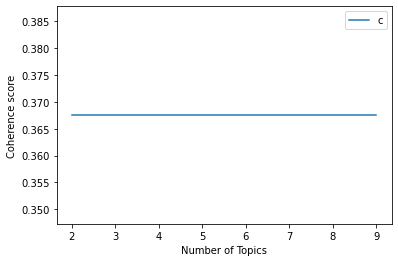

[0.36753481226890655,
 0.36753481226890655,
 0.36753481226890655,
 0.36753481226890655,
 0.36753481226890655,
 0.3675348122689065,
 0.3675348122689065,
 0.3675348122689065]

In [ ]:
x=range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
coherence_values

In [116]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=9)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)


[(1,
  '0.007*"study" + 0.006*"said" + 0.004*"year" + 0.004*"time" + 0.004*"also"'),
 (0,
  '0.023*"said" + 0.008*"police" + 0.004*"county" + 0.004*"family" + 0.004*"people"'),
 (4,
  '0.007*"said" + 0.005*"like" + 0.004*"time" + 0.004*"year" + 0.004*"people"'),
 (6,
  '0.012*"said" + 0.006*"company" + 0.004*"year" + 0.004*"people" + 0.003*"also"'),
 (5,
  '0.014*"trump" + 0.013*"said" + 0.007*"president" + 0.006*"would" + 0.005*"house"')]

In [59]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  25.518725
5       0.648955  71.707100       2        1  23.967832
0      71.019684   9.971006       3        1  10.087415
2       3.785981  33.185135       4        1   6.711968
9     -42.666500  -9.222070       5        1   6.392069
1      -3.621689 -43.526516       6        1   6.104549
4      -3.632402  -4.171708       7        1   5.838038
3     -36.584400  35.804413       8        1   5.169402
8      44.391380  50.615383       9        1   5.105036
7      40.235809 -31.591665      10        1   5.104967, topic_info=           Term        Freq       Total Category  logprob  loglift
283        said  140.000000  140.000000  Default  30.0000  30.0000
322       trump   25.000000   25.000000  Default  29.0000  29.0000
948      police   32.000000   32.000000  Default  28.0000  28.0000
264   president   23.000000   23.000000  Default  27.0000  27.0000
1426      study    8.000000    8.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
322       trump    1.181433   25.822879  Topic10  -6.0264  -0.1096
68         last    1.044740   17.705660  Topic10  -6.1493   0.1448
404       could    1.031655   23.671741  Topic10  -6.1619  -0.1582
762        many    0.954088   13.914946  Topic10  -6.2401   0.2950
320        told    0.957088   22.417254  Topic10  -6.2369  -0.1787

[1016 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4183      2  0.295492      2018
4183      9  0.295492      2018
9672      8  1.164727  abortion
351       1  0.616318  accident
351       5  0.616318  accident
...     ...       ...       ...
123       6  0.036253     |||||
123       7  0.036253     |||||
123       8  0.072506     |||||
123       9  0.036253     |||||
123      10  0.072506     |||||

[930 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 3, 10, 2, 5, 4, 9, 8])

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary, corpus_lda,texts,
                                                            10, 2, 1)

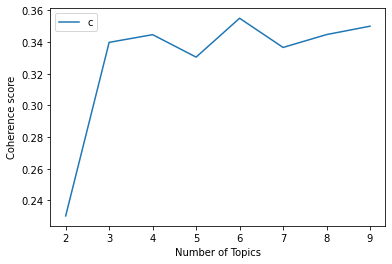

[0.23019345517966366,
 0.33981552581164115,
 0.34468008871563605,
 0.33050207703585743,
 0.3550513914715762,
 0.3366086524794592,
 0.34473185809765927,
 0.35003162471308497]

In [ ]:
x=range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
coherence_values

In [ ]:
lsa = models.LsiModel(corpus, id2word=dictionary, num_topics=9)
corpus_lsa = lsa[corpus_tfidf] 
lsa.show_topics(total_topics,10)

[(0,
  '0.299*"mayor" + 0.277*"governor" + 0.267*"said" + 0.233*"zimmer" + 0.205*"2013" + 0.170*"email" + 0.149*"wildstein" + 0.147*"would" + 0.124*"hoboken" + 0.124*"office"'),
 (1,
  '-0.441*"said" + 0.261*"mayor" + 0.226*"governor" + 0.212*"zimmer" + 0.156*"2013" + -0.150*"people" + -0.136*"trump" + 0.136*"wildstein" + 0.131*"email" + -0.127*"year"'),
 (2,
  '0.519*"tobacco" + 0.459*"child" + 0.216*"human" + 0.198*"work" + 0.184*"rights" + 0.168*"watch" + 0.166*"labor" + 0.164*"working" + -0.162*"trump" + 0.151*"worker"'),
 (3,
  '0.499*"trump" + -0.438*"said" + -0.259*"police" + 0.192*"president" + 0.135*"clinton" + 0.135*"would" + -0.104*"officer" + 0.099*"think" + 0.098*"campaign" + 0.093*"going"'),
 (4,
  '0.375*"trump" + 0.312*"said" + 0.181*"tobacco" + -0.172*"study" + -0.152*"brain" + -0.146*"year" + -0.132*"time" + 0.130*"child" + 0.125*"president" + -0.122*"injury"')]

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [88]:
# Write your code here

!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis



  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-5tym6gzj/pyldavis_6cb862c08a38474eb100faa327e01be9
  Running command git clone -q https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-5tym6gzj/pyldavis_6cb862c08a38474eb100faa327e01be9
  Installing build dependencies ... done
  Getting requirements to build wheel ... canceled
ERROR: Operation cancelled by user


In [91]:
!pip install lda2vec
import lda2vec

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [98]:
# Write your code here
!pip install bertopic[visualization]
from bertopic import BERTopic



     |████████████████████████████████| 57 kB 3.1 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 5.2 MB 22.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 3.8 MB 45.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 895 kB 40.5 MB/s 
     |████████████████████████████████| 636 kB 40.4 MB/s 
     |████████████████████████████████| 6.5 MB 39.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330847 sha256=bbb0cc4a32404230e152ac4046200aa265f665fefc1a7be04eeacab47ace4b75
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentenc

In [106]:
model = BERTopic(verbose=True,nr_topics=10)

docs =df['processed data']
 
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2022-04-02 08:43:49,477 - BERTopic - Transformed documents to Embeddings
2022-04-02 08:44:17,765 - BERTopic - Reduced dimensionality with UMAP
2022-04-02 08:44:18,321 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-04-02 08:44:58,743 - BERTopic - Reduced number of topics from 158 to 11


In [107]:
model.visualize_topics()

In [110]:
model.visualize_barchart(n_words=10,top_n_topics=10)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [120]:
coherencemodel = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coh_lda=coherencemodel.get_coherence()


In [119]:
coherencemodel2=CoherenceModel(model=lsa, texts=texts, dictionary=dictionary, coherence='c_v')
coh_lsa=coherencemodel.get_coherence()

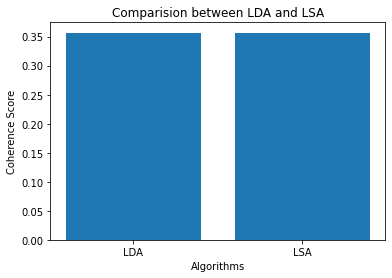

In [125]:
coherence=['LDA','LSA']
value=[coh_lda,coh_lsa]
plt.bar(coherence,value)
plt.xlabel('Algorithms')
plt.ylabel('Coherence Score')
plt.title('Comparision between LDA and LSA')
plt.show()